# Installing the Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the Dataset


In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\New folder (3)\Project Session\My PROJECTS DATASETS\who_suicide_statistics.csv")
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


# EDA

In [3]:
df.shape

(43776, 6)

In [4]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [6]:
df=df.sort_values(["year"],ascending=True)
df.head()

,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


In [7]:
# Imputing the NaN values from the population column

df['population'] = df['population'].fillna(df['population'].median())
df['population'].isnull().any()
     

False

In [8]:
# renaming the columns

df.rename({"suicides_no":"Suicides","sex":"Gender"},axis=1,inplace=True)
df.columns

Index(['country', 'year', 'Gender', 'age', 'Suicides', 'population'], dtype='object')

In [9]:
# Imputing the values suicides no column

df["Suicides"]=df["Suicides"].fillna(0)
df["Suicides"].isnull().any()

False

In [10]:
df.corr()

,year,Suicides,population
year,1.000000,-0.000151,0.021357
Suicides,-0.000151,1.000000,0.606434
population,0.021357,0.606434,1.000000


In [11]:
df.describe()


,year,Suicides,population
count,43776.000000,43776.000000,4.377600e+04
mean,1998.502467,183.352865,1.504013e+06
std,10.338711,780.857898,3.438451e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,0.000000,1.184982e+05
50%,1999.000000,11.000000,3.806550e+05
75%,2007.000000,83.000000,1.067009e+06
max,2016.000000,22338.000000,4.380521e+07


In [12]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43776 entries, 6204 to 25858
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     43776 non-null  object 
 1   year        43776 non-null  int64  
 2   Gender      43776 non-null  object 
 3   age         43776 non-null  object 
 4   Suicides    43776 non-null  float64
 5   population  43776 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


# Data Visualization


<AxesSubplot:>

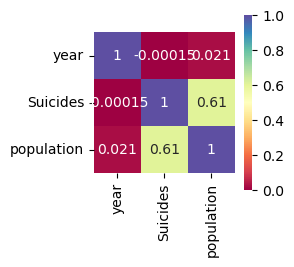

In [13]:
# correlation plot

corr=df.corr()
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
sns.heatmap(corr,cmap="Spectral",annot=True,square=True)

In [14]:
#distribution of countries in the dataset

df["country"].value_counts()

Hungary                     456
Mauritius                   456
Austria                     456
Netherlands                 456
United States of America    456
                           ... 
Mongolia                     24
Iraq                         12
Macau                        12
Cabo Verde                   12
Zimbabwe                     12
Name: country, Length: 141, dtype: int64

In [15]:
df["country"].value_counts().count()

141

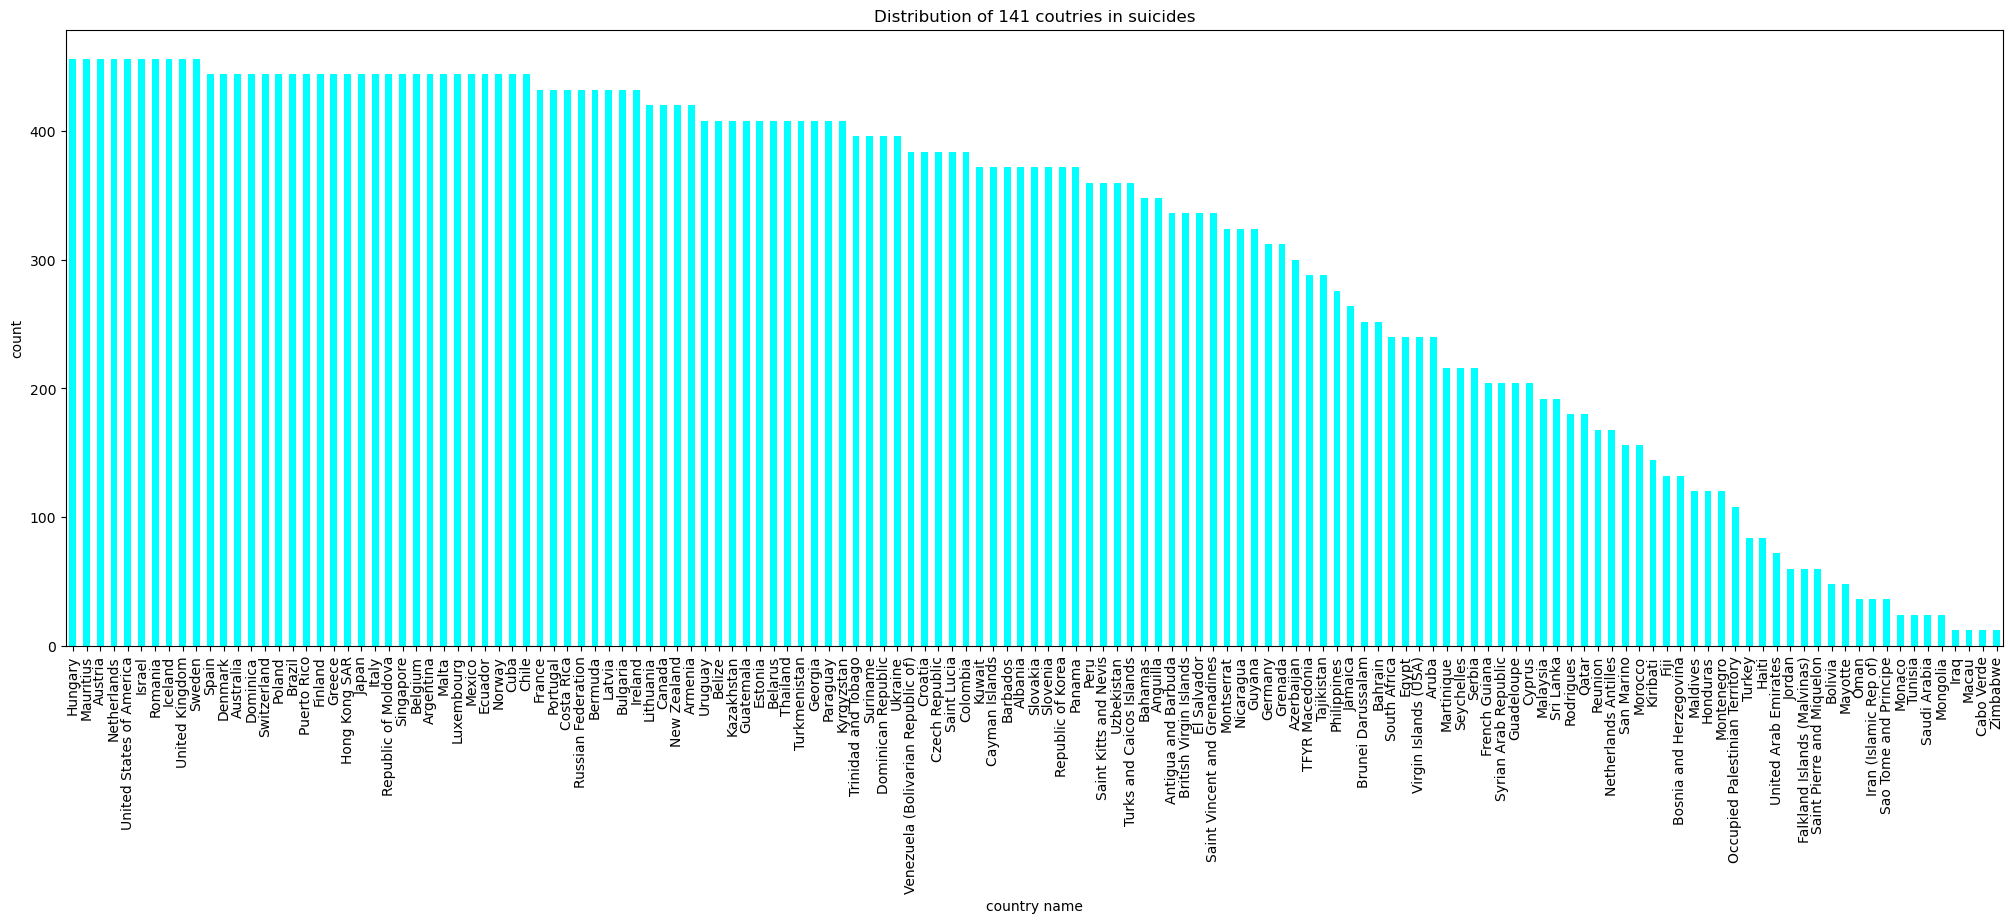

In [16]:
# visualising the different countries distribution in the dataset

df["country"].value_counts().plot.bar(color="cyan",figsize=(25,8))
plt.title('Distribution of 141 coutries in suicides')
plt.xlabel('country name')
plt.ylabel('count')
plt.show()

In [17]:
df["year"].value_counts().count()

38

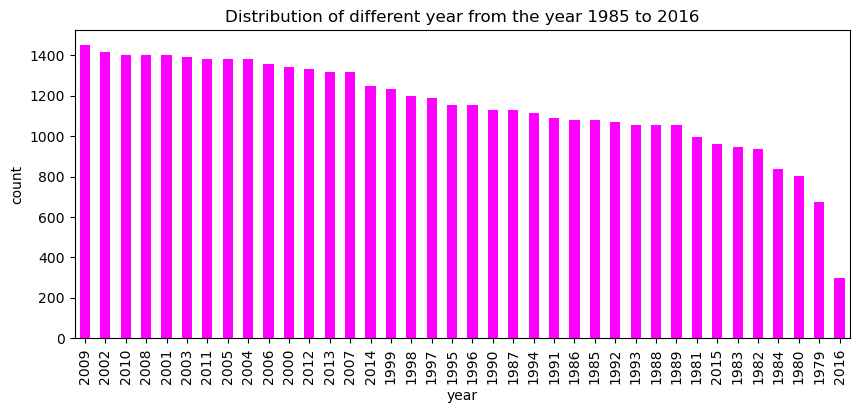

In [18]:
# visualising the different year distribution in the dataset


df["year"].value_counts().plot.bar(color="magenta",figsize=(10,4))

plt.title('Distribution of different year from the year 1985 to 2016')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

In [19]:
# label encoding for gender

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

df["Gender"].value_counts()

0    21888
1    21888
Name: Gender, dtype: int64

In [20]:
df.head(
)

,country,year,Gender,age,Suicides,population
6204,Brazil,1979,0,15-24 years,385.0,12448100.0
26470,Netherlands,1979,1,55-74 years,217.0,1040500.0
26471,Netherlands,1979,1,75+ years,93.0,235800.0
2615,Austria,1979,1,75+ years,0.0,141900.0
2614,Austria,1979,1,55-74 years,0.0,573800.0


In [21]:
# replacing categorical values in the age column


my_dict={'5-14 years': 0,'15-24 years': 1,'25-34 years': 2,'35-54 years': 3,'55-74 years': 4,'75+ years': 5}

In [22]:
df["age"]=df["age"].map(my_dict)
df["age"]

6204     1
26470    4
26471    5
2615     5
2614     4
        ..
23430    1
23431    2
23432    3
20030    3
25858    4
Name: age, Length: 43776, dtype: int64

In [23]:
df["age"].value_counts()

1    7296
4    7296
5    7296
0    7296
3    7296
2    7296
Name: age, dtype: int64

In [24]:
x1=df[df["age"]==0]["Suicides"].sum()
x2=df[df["age"]==1]["Suicides"].sum()
x3=df[df["age"]==2]["Suicides"].sum()
x4=df[df["age"]==3]["Suicides"].sum()
x5=df[df["age"]==4]["Suicides"].sum()
x6=df[df["age"]==5]["Suicides"].sum()

x=[x1,x2,x3,x4,x5,x6]

In [25]:
x=pd.DataFrame(data=x,index=['5-14', '15-24', '25-34', '35-54', '55-74', '75+'])
#x.index=['5-14', '15-24', '25-34', '35-54', '55-74', '75+']

In [26]:
x.head()

,0
5-14,63312.0
15-24,984287.0
25-34,1367333.0
35-54,2895388.0
55-74,1958468.0


In [27]:
df.groupby("age")["Suicides"].sum()


age
0      63312.0
1     984287.0
2    1367333.0
3    2895388.0
4    1958468.0
5     757667.0
Name: Suicides, dtype: float64

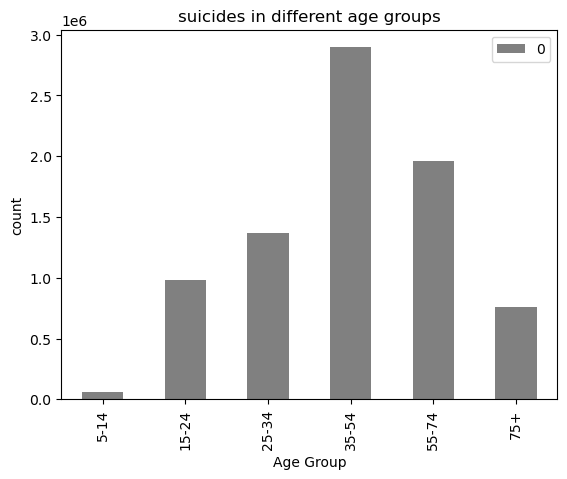

In [28]:
# suicides in different age groups


x.plot(kind="bar",color="grey")
plt.legend()
plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()

In [29]:
df["Gender"].value_counts()

0    21888
1    21888
Name: Gender, dtype: int64

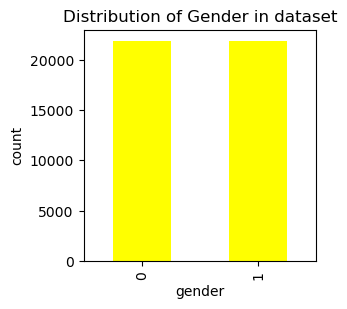

In [30]:
# visualising the gender distribution in the dataset


df["Gender"].value_counts().plot(kind="bar",color="yellow",figsize=(3,3))
plt.title('Distribution of Gender in dataset')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()
     

In [31]:
# total population of 141 countres over which the suicides survey is committed

df["population"].sum()


65839692243.0

In [32]:
# Average population

avg_population=df["population"].mean()
avg_population

1504013.4375685307

In [33]:
# Average suicide in the world

avg_suicide=df["Suicides"].mean()
avg_suicide

183.35286458333334

In [34]:
# Average suicide by women in the world

avg_suicide_by_women=df[df["Gender"]==0]["Suicides"].mean()
avg_suicide_by_women

86.9093567251462

In [35]:
# Average suicide by men in the world

avg_suicide_by_men=df[df["Gender"]==1]["Suicides"].mean()
avg_suicide_by_men

279.7963724415205

In [36]:
# Totalsuicide by men in the world

index=df["Gender"]==1
print("Men suicides total:",df[index].Suicides.sum())


Men suicides total: 6124183.0


In [37]:
# Total suicide by women in the world

index=df["Gender"]==0
print("woMen suicides total:",df[index].Suicides.sum())

woMen suicides total: 1902272.0


In [38]:
#Countries with most number of suicides

countrywise=df.groupby(["country"]).Suicides.sum().sort_values(ascending=False)

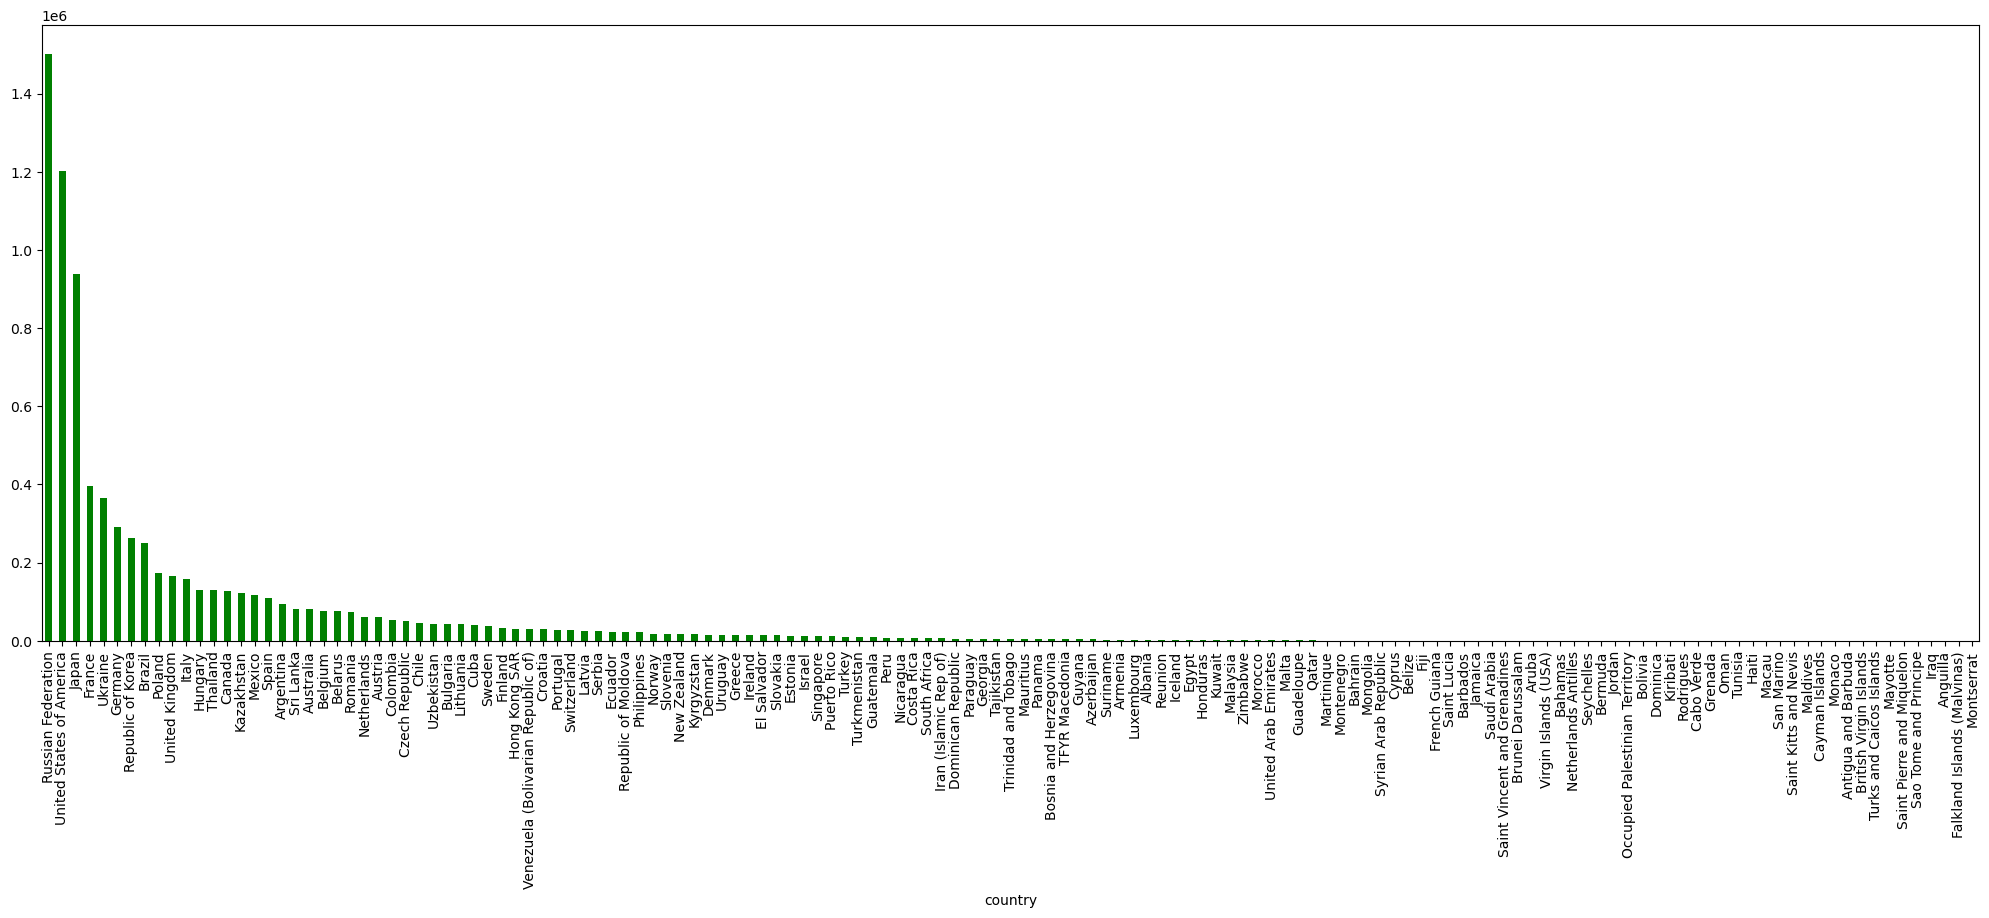

In [39]:
countrywise.plot(kind="bar",color="green",figsize=(25,8))
plt.show()

In [40]:
#Yearwise most number of suicides

yearwise=df.groupby(["year"]).Suicides.sum().sort_values(ascending=False)

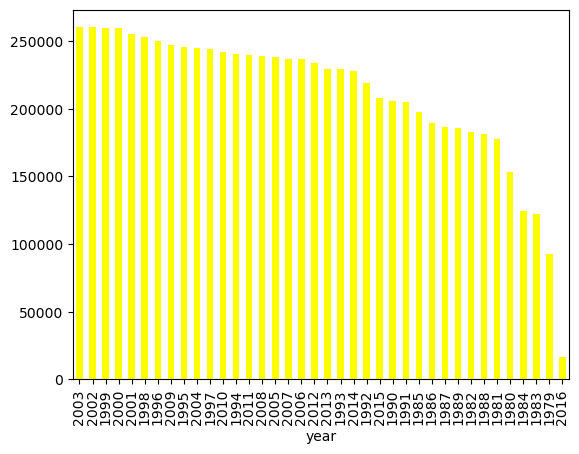

In [41]:
yearwise.plot(kind="bar",color="yellow")
plt.show()

In [42]:
df.groupby(["country","year"])[["Suicides"]].sum()

Suicides
country              year          
Albania              1985       0.0
                     1986       0.0
                     1987      73.0
                     1988      63.0
                     1989      68.0
...                             ...
Virgin Islands (USA) 2010       8.0
                     2011       8.0
                     2012      10.0
                     2015       3.0
Zimbabwe             1990     764.0

[3648 rows x 1 columns]

In [43]:
# rearranging the columns 

df=df[['country', 'year', 'Gender', 'age', 'population', 'Suicides']]
df.head()

,country,year,Gender,age,population,Suicides
6204,Brazil,1979,0,1,12448100.0,385.0
26470,Netherlands,1979,1,4,1040500.0,217.0
26471,Netherlands,1979,1,5,235800.0,93.0
2615,Austria,1979,1,5,141900.0,0.0
2614,Austria,1979,1,4,573800.0,0.0


In [44]:
# Removing the country Column

df.drop(["country"],axis=1,inplace=True)
df.head()

,year,Gender,age,population,Suicides
6204,1979,0,1,12448100.0,385.0
26470,1979,1,4,1040500.0,217.0
26471,1979,1,5,235800.0,93.0
2615,1979,1,5,141900.0,0.0
2614,1979,1,4,573800.0,0.0


In [45]:
#splitting the data into dependent and independent variables


x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

x.shape

(43776, 4)

In [46]:
y=y.reshape(-1)
y.shape

(43776,)

In [47]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


# min max scaling

from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

# scaling the independent variables

x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)



In [48]:
y_train.shape

(32832,)

In [49]:
x_test.shape

(10944, 4)

In [50]:
x_train.shape

(32832, 4)

# Model Building and Evaluation

In [51]:
#importing Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("r2_score",r2_score(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.4056779625569078
mse 421515.89160571375
rmse 649.2425522142813


In [52]:
y_test.shape

(10944,)

In [57]:
#importing Support Vector Regression model

from sklearn.svm import SVR

model=SVR()
model.fit(x_train,y_train)
y2_pred=model.predict(x_test)

print("r2_score",r2_score(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.5854486717361219
mse 294015.6375510697
rmse 542.2320882713137


In [54]:
#importing Decision Tree Regression model


from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("r2_score",r2_score(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.8064439942625081
mse 137277.31296164778
rmse 370.5095315395378


In [55]:
#importing RandomForest Regression model


from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("r2_score",r2_score(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.8692320244996414
mse 92745.64346233875
rmse 304.54169412797773


In [56]:
#importing AdaBoost Regression model


from sklearn.ensemble import AdaBoostRegressor

model=AdaBoostRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("r2_score",r2_score(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.5854486717361219
mse 294015.6375510697
rmse 542.2320882713137
